What other feature would be useful to include in these functions? What about parameters for different font sizes, size and colors of points and lines in scatter plots?

### Exercises:

1. Create an array with (100) elements using np.arange()

2. Create two numpy arrays whose values are neither all 0 or 1. Multiply the two arrays and save the result i.e., result = array1 * array2.

3. Create a dictionary where each key points to a unique numpy array. All arrays should be of the same length. Then transform that dictionary into a pandas dataframe.

4. Import a data set for your project in pandas. You may use whatever means you prefer to import the data. Print the dataframe.

5. Create a new column of data derived from the data that you have already imported. hint: this may be a ratio or whatever transformation that you think would be useful...

6. Use a for loop to print individually each column in the dataframe.

7. Create a function that plots 2 to 3 different variables from the dataframe. The function may look something like "def plot_data(df,names, etc...). Each plot should include a legend and title.

8. Create a bar graph plot using the data you have imported.

9. On any of the graphs you have created, change the font size, axis labels, tick labels, color, linewidth, and so forth. Adjust these parameters to make the visualization aesthetically appealing..


# 1

In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import csv

array = np.arange(100)
len(array)

100

# 2

In [2]:
zerosArray = np.zeros(5)
onesArray = np.ones(5)
def mult(a,b):
    result = a * b
    return result
multArray = mult(zerosArray, onesArray)
print(multArray)

[0. 0. 0. 0. 0.]


# 3

In [3]:
dict = {"First Array": zerosArray, "Second Array": onesArray, "Third Array": multArray}
df = pd.DataFrame(dict)
print(df.T)


                0    1    2    3    4
First Array   0.0  0.0  0.0  0.0  0.0
Second Array  1.0  1.0  1.0  1.0  1.0
Third Array   0.0  0.0  0.0  0.0  0.0


# 4

In [21]:
# Override error with legacy pandas_datareader in order to get only "adj close" data
# See https://pypi.org/project/yfinance/
yf.pdr_override()


# Specify dates to gather
start_date = dt.datetime(2016, 12, 31)
end_date = dt.datetime.today()

In [22]:
# Initialize a dictionary and populate a list with tickers we want
portfolio_dict = {}
portfolio_tickers = ["VOO", "VUG", "BND", "TIP", "VNQ"]

In [23]:
# Pass pdr.DataReader() the ticker list, start & end date, and ask for daily "Adj Close" data and assign it to portfolio_df
portfolio_df = pdr.get_data_yahoo(portfolio_tickers, start_date, end_date)["Adj Close"]

TypeError: string indices must be integers

In [ ]:
# Verify data looks good
portfolio_df

In [20]:
# Print it
print(portfolio_df)

NameError: name 'portfolio_df' is not defined

# 5

In [ ]:
#This doesn't work
#for ticker in portfolio_df:
#    portfolio_df[ticker]["% Change"] = portfolio_df[ticker].pct_change()*100

In [ ]:
percent_df = portfolio_df.pct_change()*100
percent_df

In [ ]:
concat_df = pd.concat([portfolio_df, percent_df], axis='columns', keys=['Adj Close', "Daily % Change"])

In [ ]:
concat_df

# 6

In [ ]:
for col in concat_df:
    print(concat_df[col])


# 7

In [ ]:
top_level = concat_df.columns.get_level_values(0).unique()
top_level

In [ ]:
concat_df[top_level[1]]

In [ ]:
def plots_series(df):
    for level in df:
        fig, ax = plt.subplots(figsize = (15,10))
        df[level].plot.line(ax=ax)
        ax.set_title(level, fontsize = 20)

In [ ]:
plots_series(concat_df)

In [ ]:
def plot_pct(df):
    plt.rcParams.update({"font.size": 24})
    fix, ax = plt.subplots(figsize=(20,15))
    plt.title("Daily % Change")
    df['Daily % Change'].plot.line(legend = True, ax = ax, alpha=.5)
plot_pct(concat_df)

In [ ]:
concat_df.columns.get_level_values(0).unique()

In [ ]:
def adj_plots(df):
    level = df.columns.get_level_values(0).unique()
    # Loop through the unique values
    for col in level:
        # For each unique value, assign the original df[unique_value] to sub_df Level 1
        sub_df = df[col]
        # For each unique value within those unique values, assign to sub_cols Level 2
        sub_cols=sub_df.columns
    # Count how many columns are in level 2
    numCharts = len(sub_cols)
    
    # Level 1 plot
    # Make a big plot with subplots for each ticker
    fig, ax = plt.subplots(nrows=1, ncols=len(sub_cols), figsize = (60,8))
    
    # Loop through the # of columns in level 2
    for i in range(numCharts):
        # Call the columns data
        key = df.keys()[i]
        color = "C" + str(i)
        alpha = .35 + .15 * i
        # plot key according to position in loop
        df[key].plot.line(color=color, alpha=alpha, ax=ax[i], legend=True)
        ax[i].set_title(key, color=color, fontsize =20)

In [ ]:
adj_plots(concat_df)

# 8

In [26]:
percent_df.keys()

NameError: name 'percent_df' is not defined

In [27]:
len(percent_df.columns)

NameError: name 'percent_df' is not defined

plt.rcParams.update({"font.size": 24})
fig, ax = plt.subplots(figsize = (60, 8))
numVars = len(percent_df.columns)
for i in range(numVars):
    # Call the columns data
    color = "C" + str(i)
    alpha = .35 + .15 * i
    # plot key according to position in loop
    percent_df[i].plot.bar(color=color, alpha=alpha, ax=ax[i], legend=True)
    ax[i].set_title(key, color=color, fontsize =20)
    

NameError: name 'percent_df' is not defined

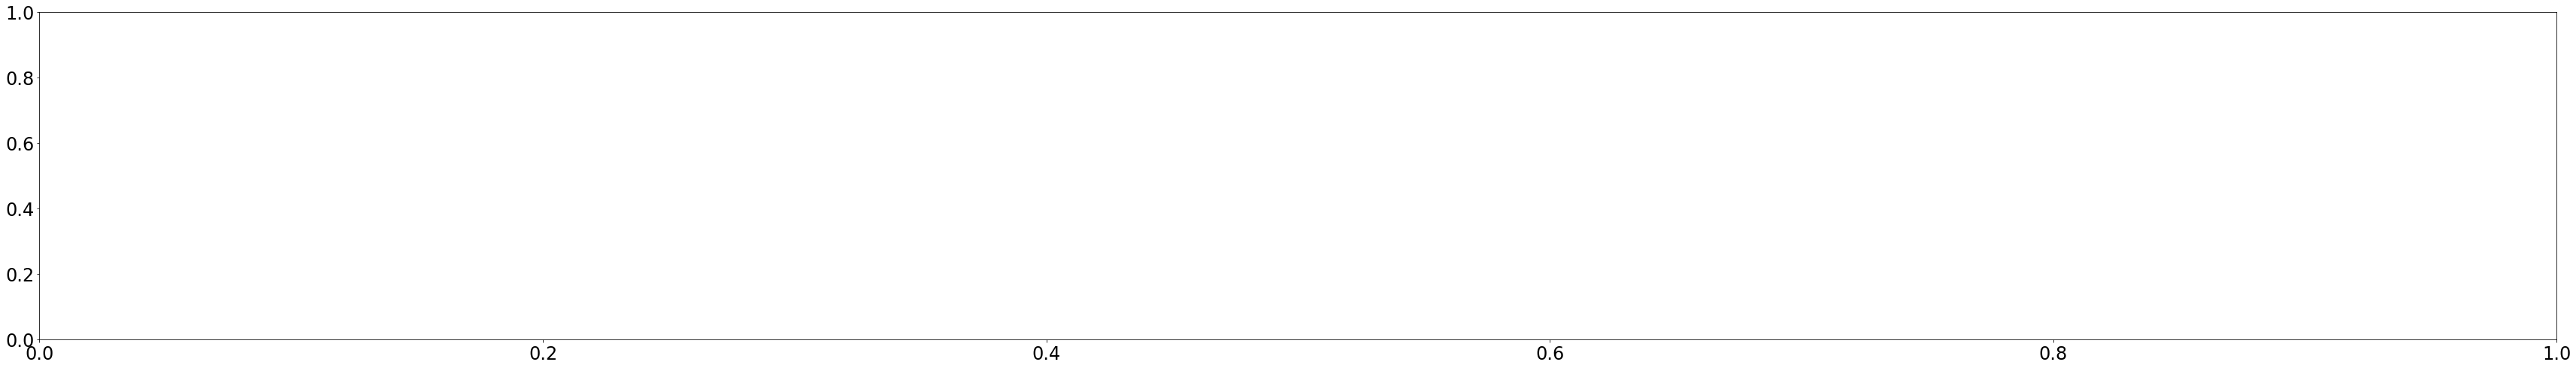

In [28]:
plt.rcParams.update({"font.size": 24})
fix, ax = plt.subplots(figsize=(60,8))
percent_df.plot.bar(width = .99, alpha = .75, ax=ax)


##### The data is too much, so we are going to redownload data and change the interval

In [29]:
portfolio_df_2 = pdr.DataReader(portfolio_tickers, start_date, end_date, interval="1mo")["Adj Close"]

TypeError: DataReader() got an unexpected keyword argument 'interval'

In [ ]:
percent_df_2 = portfolio_df_2.pct_change()*100
percent_df_2

In [ ]:
percent_df_2.index

In [ ]:
percent_df_2.keys()[1]

# Part of #9 was figuring out how locators and formatters works in order to reduce tick labels

In [24]:
def bar_plot(df):
    numVar = len(df.columns)
    fig, ax = plt.subplots(1, numVar, figsize = (60,8))
    for i in range(numVar):
        key = df.keys()[i]
        color = "C" + str(i+8)
        alpha = .35 + .15 * i
        df[key].plot.bar(color=color, alpha=alpha, ax=ax[i], width = .95)
        ax[i].set_title(key, color=color, fontsize =64)
        
        # Automatically chooses tick labels
        ax[i].xaxis.set_major_locator(plt.AutoDateLocator())
        
        #Rotes and right aligns x labels
        fig.autofmt_xdate()


In [25]:
bar_plot(percent_df_2)

NameError: name 'percent_df_2' is not defined


For formatting:
https://www.python-graph-gallery.com/basic-time-series-with-matplotlib
https://matplotlib.org/stable/gallery/ticks/tick-formatters.html
https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
